# FASE 1: Entendiendo el negocio

Epic Games es una empresa de desarrollo de videojuegos importante, que ha logrado un éxito sifnificativo con su juego mas famoso Fornite. Epic necesita saber en que modo de juego se desarrollan mas las habilidades de los jugadores, ya que cada modo de juegos tiene un ritmo y estrategia diferente de ganar.

1-Relación entre tiempo jugado y rendimiento:
Los jugadores que dedican más minutos a jugar en un modo de juego específico como los modos de juegos (solo/duo/trios), tienden a tener un mayor kd (kill/death ratio) y una mayor proporción de victorias (winRatio) en ese modo. Lo que se quiere saber es que dependiendo el modo de juego, cual es el que tiene mas winrate entre los jugadores, y si existe una fuerte correlación entre la puntuación (score) y el número de victorias (top1) en los tres modos de juego.

In [1]:
# Se Realiza las importanciones de las Librerias y del Dataset
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# DataSet
df = pd.read_csv(r'C:\Users\matia\Downloads\fortnite-machine\data\Fortnite_players_stats.csv', sep=",")

In [3]:
#Se Filtra el tipo de dato de la columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                1435 non-null   object 
 1   Solo score            1435 non-null   int64  
 2   Solo top1             1435 non-null   int64  
 3   Solo kd               1435 non-null   float64
 4   Solo winRatio         1435 non-null   float64
 5   Solo matches          1435 non-null   int64  
 6   Solo kills            1435 non-null   int64  
 7   Solo minutesPlayed    1435 non-null   int64  
 8   Duos score            1435 non-null   int64  
 9   Duos top1             1435 non-null   int64  
 10  Duos kd               1435 non-null   float64
 11  Duos winRatio         1435 non-null   float64
 12  Duos matches          1435 non-null   int64  
 13  Duos kills            1435 non-null   int64  
 14  Duos minutesPlayed    1435 non-null   int64  
 15  Trios score          

In [4]:
# Se filtran las 10 primeras Filas
df.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777,1298412,1242,...,40507.0,89472.0,294971.0,184.0,185.0,4.81,11.7,1566.0,6654.0,8296.0
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258,2508015,1935,...,40730.0,69693.0,383002.0,274.0,259.0,4.49,7.4,3718.0,15447.0,12634.0
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739,6438735,5449,...,6803.0,30012.0,370497.0,185.0,267.0,2.67,8.2,2263.0,5541.0,12625.0
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835,118705,65,...,1238.0,19419.0,827372.0,118.0,116.0,2.01,3.8,3067.0,5937.0,19174.0
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441,5873450,1250,...,6695.0,51058.0,440353.0,97.0,199.0,1.09,3.2,3048.0,3205.0,17273.0


# Verifica culumnas y tipos de datos

In [5]:
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Player ------ Tipo de variable: Cualitativa nominal
Columna Solo score ------ Tipo de variable: Cuantitativa discreta
Columna Solo top1 ------ Tipo de variable: Cuantitativa discreta
Columna Solo kd ------ Tipo de variable: Cuantitativa continua
Columna Solo winRatio ------ Tipo de variable: Cuantitativa continua
Columna Solo matches ------ Tipo de variable: Cuantitativa discreta
Columna Solo kills ------ Tipo de variable: Cuantitativa discreta
Columna Solo minutesPlayed ------ Tipo de variable: Cuantitativa discreta
Columna Duos score ------ Tipo de variable: Cuantitativa discreta
Columna Duos top1 ------ Tipo de variable: Cuantitativa discreta
Columna Duos kd ------ Tipo de variable: Cuantitativa continua
Columna Duos winRatio ------ Tipo de variable: Cuantitativa continua
Columna Duos matches ------ Tipo de variable: Cuantitativa discreta
Columna Duos kills ------ Tipo de variable: Cuantitativa discreta
Columna Duos minutesPlayed ------ Tipo de variable: Cuantitativa discret

# Hipótesis.
-¿Cuáles son los jugadores con el mejor rendimiento general en cada modo de juego?
-¿Existe una relación entre el tiempo jugado y la tasa de victorias (winRatio) en diferentes modos de juego?
-¿Los jugadores que tienen un alto rendimiento en el modo Solo (en términos de score, kd, winRatio) también muestran un alto rendimiento en los modos Duos y Trios?
-¿Existe una fuerte correlación entre la puntuación (score) y el número de victorias (top1) en los tres modos de juego?

# FASE 2: Data Understanding


Verificación de datos nulos y posibles errores en DataFrame

In [6]:
# Verificación de datos nulos en el dataset
df.isnull().sum()

Player                   0
Solo score               0
Solo top1                0
Solo kd                  0
Solo winRatio            0
Solo matches             0
Solo kills               0
Solo minutesPlayed       0
Duos score               0
Duos top1                0
Duos kd                  0
Duos winRatio            0
Duos matches             0
Duos kills               0
Duos minutesPlayed       0
Trios score             24
Trios top1              24
Trios kd                24
Trios winRatio          24
Trios matches           24
Trios kills             24
Trios minutesPlayed     24
Squads score             1
Squads top1              1
Squads kd                1
Squads winRatio          1
Squads matches           1
Squads kills             1
Squads minutesPlayed     1
LTM score                1
LTM top1                 1
LTM top3                 1
LTM kd                   1
LTM winRatio             1
LTM matches              1
LTM kills                1
LTM minutesPlayed        1
d

In [7]:
df[df['Squads score'].isnull()]

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
294,Sol1101,4172204,195,0.67,0.8,24785,16510,186168,2402,0,...,NaN,NaN,221.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0


Medidas de posición

In [8]:
#Resumen de Medidas de posición, para datos numéricos
df.describe(include="number")

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,Duos kd,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
count,1.435000e+03,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1.435000e+03,1435.000000,1435.000000,...,1434.000000,1434.000000,1.434000e+03,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,1.088202e+06,328.909408,1.816300,4.853937,6911.060627,11781.843206,43517.135889,1.397810e+06,836.602787,2.483686,...,11401.596932,40738.556485,2.902681e+05,74.070432,79.933752,3.885481,6.854463,1198.041144,4001.190377,8503.480474
std,8.872639e+05,529.192568,1.156026,5.330249,5408.219523,11417.340071,36314.877771,9.805693e+05,727.366968,1.596461,...,8379.376319,19507.459127,3.565171e+05,98.823116,106.559344,2.215753,6.042537,1095.757652,4296.714124,9849.725206
min,4.453000e+03,0.000000,0.080000,0.000000,30.000000,28.000000,210.000000,3.760000e+02,0.000000,0.000000,...,0.000000,74.000000,2.210000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
25%,4.355170e+05,65.500000,1.050000,1.600000,2875.000000,3861.000000,16922.000000,5.863575e+05,321.000000,1.395000,...,5702.750000,29046.000000,7.857025e+04,20.000000,23.000000,2.350000,3.000000,455.500000,1374.250000,2421.250000
50%,9.070010e+05,162.000000,1.480000,2.900000,5728.000000,8452.000000,35762.000000,1.185518e+06,685.000000,2.090000,...,9717.000000,39392.000000,1.674590e+05,46.000000,48.000000,3.440000,5.300000,856.000000,2666.000000,5193.500000
75%,1.506555e+06,366.000000,2.200000,6.100000,9585.000000,15993.000000,59471.000000,1.994718e+06,1103.500000,3.050000,...,15076.250000,51403.250000,3.659395e+05,91.000000,91.000000,4.840000,8.900000,1572.250000,4986.000000,11155.250000
max,6.772116e+06,6480.000000,9.600000,44.100000,36487.000000,89023.000000,283835.000000,6.438735e+06,7594.000000,14.000000,...,117327.000000,150439.000000,3.900561e+06,1428.000000,1649.000000,16.590000,63.900000,8079.000000,39231.000000,120381.000000


In [9]:
df.describe(include='object')

,Player
count,1435
unique,1435
top,O-HO-HO-HOǃ
freq,1


In [10]:
#Verificar si hay datos duplicados
dataDuplicada = df.duplicated().sum()
dataDuplicada

np.int64(0)

In [11]:
#Reemplazar o eliminar los valores faltantes con 0
df['Trios score'] = df['Trios score'].fillna(0) 

In [12]:
#Convertir la columna de float a int
df['Trios score'] = df['Trios score'].astype(int)

In [13]:
#Escalar las columnas numéricas
columnaNumericas = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[columnaNumericas] = scaler.fit_transform(df[columnaNumericas])

In [14]:
#Aplicar KNNImputer para reemplazar valores faltantes en 'Trios score'
knn_imputer = KNNImputer(n_neighbors=5)  # Usando 5 vecinos
data_scaled_imputed = knn_imputer.fit_transform(data_scaled[columnaNumericas])

In [15]:
#Convertir el resultado imputado de nuevo a un DataFrame
data_imputed = pd.DataFrame(data_scaled_imputed, columns=columnaNumericas)

In [16]:
#Desescalar los datos para volver a su forma original
data_imputed[columnaNumericas] = scaler.inverse_transform(data_imputed[columnaNumericas])

In [17]:
#Asegurarse de que el tipo de datos de 'Trios score' sea int después de la imputación
data_imputed['Trios score'] = data_imputed['Trios score'].astype(int)

In [18]:
#Mostrar las primeras filas del dataset para verificar la imputación
data_imputed.head()

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,Duos kd,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,2476763.0,1828.0,4.37,18.0,10150.0,36328.0,81389.0,4702684.0,5584.0,10.71,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,439562.0,1694.0,8.71,29.1,5817.0,35895.0,12732.0,4065613.0,4141.0,9.49,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,4519465.0,4582.0,9.60,34.0,13488.0,85481.0,122171.0,1137279.0,1390.0,7.78,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,752869.0,121.0,0.84,3.3,3687.0,3005.0,32453.0,5326457.0,2249.0,1.02,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,1136282.0,1327.0,6.32,30.0,4429.0,19591.0,36245.0,3692623.0,5743.0,11.13,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0


<Axes: xlabel='Trios score'>

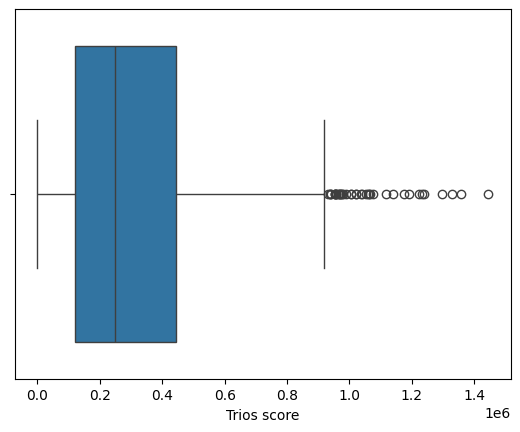

In [19]:
#Boxplot de trios score
sb.boxplot(x=df['Trios score'])